# Tarea - Ajuste de curvas

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [166]:
import numpy as np
# Datos extraidos de la página de quandl
y = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

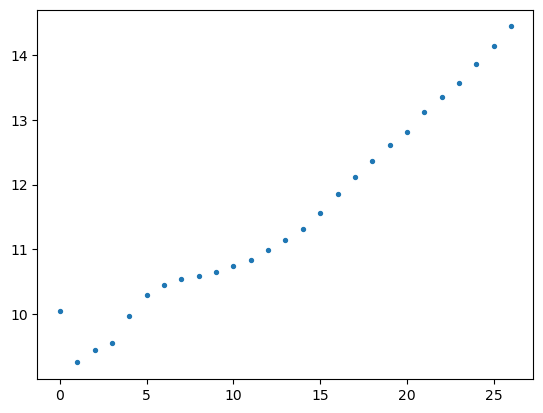

In [167]:
plt.figure()
x = np.array(range(0, 27))
plt.scatter(x, data, s = 8)
x

In [168]:
def funcioncosto(beta, X, y):
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    prediccion = X @ beta
    error = (prediccion - y)
    return (error.T @ error)[0][0]

In [169]:
m = len(y)
ones = np.ones([m, 1])
x1 = np.reshape(x, [m, 1])
x2 = np.reshape(x**2, [m, 1])
x3 = np.reshape(x**3, [m, 1])

X1 = np.hstack((ones, x1))
X2 = np.hstack((ones, x1, x2))
X3 = np.hstack((ones, x1, x2, x3))

beta_inicial1 = np.random.rand(2)
beta_inicial2 = np.random.rand(3)
beta_inicial3 = np.random.rand(4)

y_vector = np.reshape(y, [m, 1])

def foo(beta, X, y) :
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    prediccion = X @ beta
    error = prediccion - y
    return (error.T @ error)[0][0]

In [170]:
sol1 = opt.minimize(foo, beta_inicial1, args=(X1, y_vector))
sol2 = opt.minimize(foo, beta_inicial2, args=(X2, y_vector))
sol3 = opt.minimize(foo, beta_inicial3, args=(X3, y_vector))

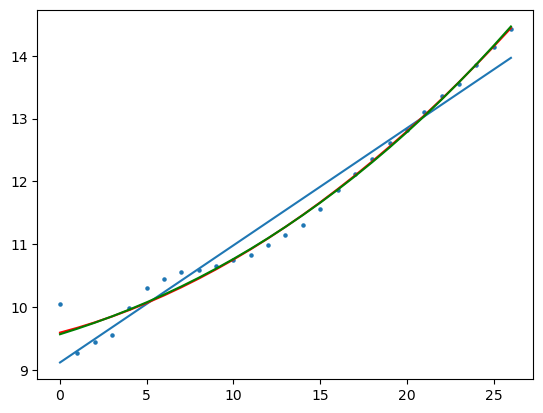

In [171]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter(x, y, s = 5)
plt.plot(x, X1 @ sol1.x)
plt.plot(x, X2 @ sol2.x, "r")
plt.plot(x, X3 @ sol3.x, "g")

<BarContainer object of 3 artists>

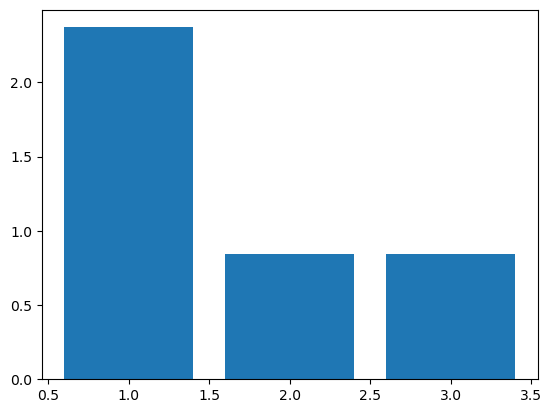

In [172]:
plt.figure()
plt.bar([1, 2, 3], [sol1.fun, sol2.fun, sol3.fun])

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

In [173]:
population = pd.read_csv('population_data.csv')
print(population)

    Year  Poblacion  Nacimientos  Decesos
0   1950      28296      1174947   418430
1   1951      29110      1183788   458238
2   1952      29980      1195209   408823
3   1953      30904      1261775   446127
4   1954      31880      1339837   378752
..   ...        ...          ...      ...
61  2011     115683      2586287   590693
62  2012     117054      2498880   602354
63  2013     118395      2478889   623599
64  2014     119713      2463420   633641
65  2015     121005      2353596   655694

[66 rows x 4 columns]


## Paso 1: [Años, Población]

In [174]:
x = population['Year'].values - 1950
y = population['Poblacion'].values

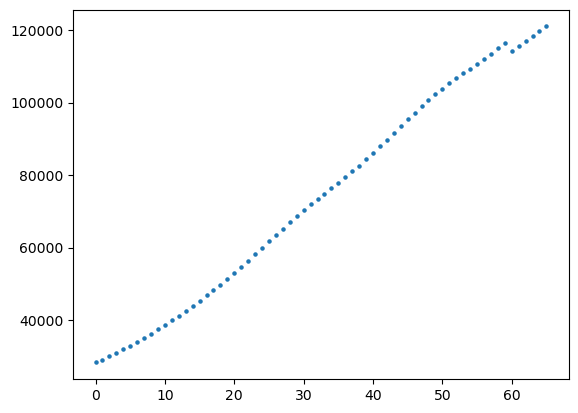

In [175]:
plt.figure()
plt.scatter(x, y, s = 5)

In [176]:
m = len(y)
ones = np.ones([m, 1])
x1 = np.reshape(x, [m, 1])
x2 = np.reshape(x**2, [m, 1])
x3 = np.reshape(x**3, [m, 1])

X1 = np.hstack((ones, x1))
X2 = np.hstack((ones, x1, x2))
X3 = np.hstack((ones, x1, x2, x3))

beta_inicial1 = np.random.rand(2)
beta_inicial2 = np.random.rand(3)
beta_inicial3 = np.random.rand(4)

y_vector = np.reshape(y, [m, 1])

def foo(beta, X, y) :
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    prediccion = X @ beta
    error = prediccion - y
    return (error.T @ error)[0][0]


In [177]:
sol1 = opt.minimize(foo, beta_inicial1, args=(X1, y_vector))
sol2 = opt.minimize(foo, beta_inicial2, args=(X2, y_vector))
sol3 = opt.minimize(foo, beta_inicial3, args=(X3, y_vector))

In [178]:
sol1

      fun: 212137169.56209362
 hess_inv: array([[ 2.95989494e-02, -6.77839263e-04],
       [-6.77839263e-04,  2.08615073e-05]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 39
      nit: 7
     njev: 13
   status: 0
  success: True
        x: array([24138.04831889,  1543.9726612 ])

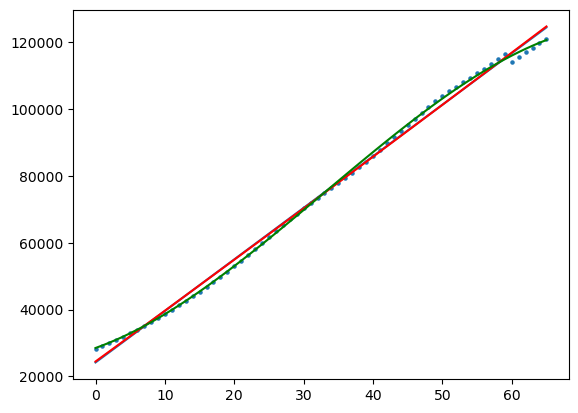

In [179]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter(x, y, s = 5)
plt.plot(x, X1 @ sol1.x)
plt.plot(x, X2 @ sol2.x, "r")
plt.plot(x, X3 @ sol3.x, "g")

<BarContainer object of 3 artists>

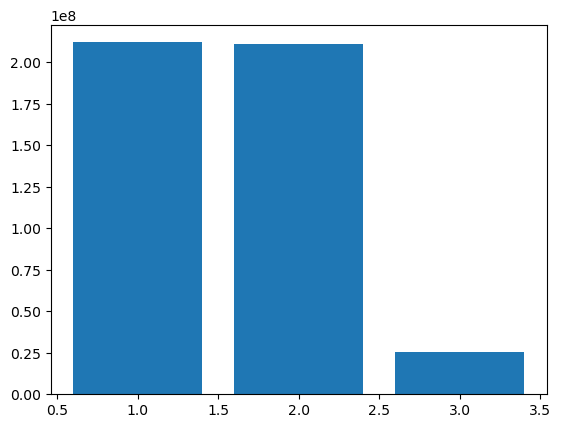

In [180]:
plt.figure()
plt.bar([1, 2, 3], [sol1.fun, sol2.fun, sol3.fun])

## Paso 2: [Años, Nacimientos]

In [181]:
x = population['Year'].values - 1950
y = population['Nacimientos'].values

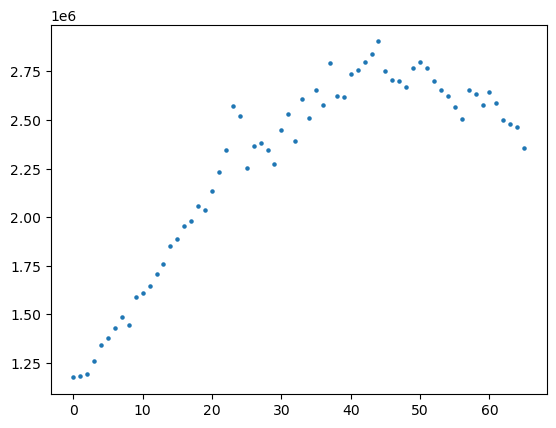

In [182]:
plt.figure()
plt.scatter(x, y, s = 5)

In [183]:
m = len(y)
ones = np.ones([m, 1])
x1 = np.reshape(x, [m, 1])
x2 = np.reshape(x**2, [m, 1])
x3 = np.reshape(x**3, [m, 1])

X1 = np.hstack((ones, x1))
X2 = np.hstack((ones, x1, x2))
X3 = np.hstack((ones, x1, x2, x3))

beta_inicial1 = np.random.rand(2)
beta_inicial2 = np.random.rand(3)
beta_inicial3 = np.random.rand(4)

y_vector = np.reshape(y, [m, 1])

def foo(beta, X, y) :
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    prediccion = X @ beta
    error = prediccion - y
    return (error.T @ error)[0][0]

In [184]:
sol1 = opt.minimize(foo, beta_inicial1, args=(X1, y_vector))
sol2 = opt.minimize(foo, beta_inicial2, args=(X2, y_vector))
sol3 = opt.minimize(foo, beta_inicial3, args=(X3, y_vector))

In [185]:
sol1

      fun: 4737912870607.082
 hess_inv: array([[ 5.56230143e-02, -1.26841841e-03],
       [-1.26841841e-03,  3.42302845e-05]])
      jac: array([      0., -262144.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 180
      nit: 6
     njev: 56
   status: 2
  success: False
        x: array([1562844.24735803,   21978.16033066])

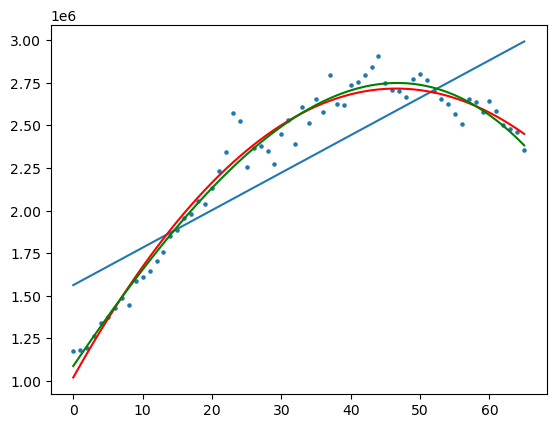

In [186]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter(x, y, s = 5)
plt.plot(x, X1 @ sol1.x)
plt.plot(x, X2 @ sol2.x, "r")
plt.plot(x, X3 @ sol3.x, "g")

<BarContainer object of 3 artists>

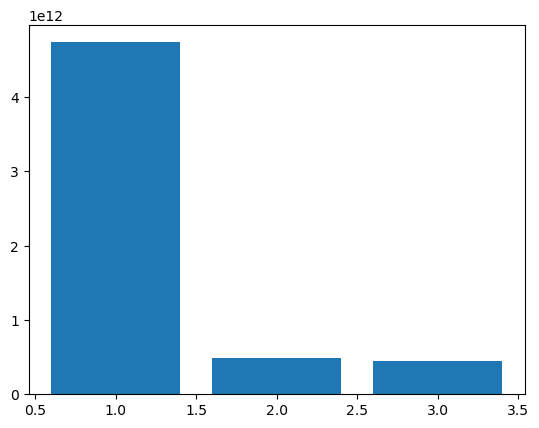

In [187]:
plt.figure()
plt.bar([1, 2, 3], [sol1.fun, sol2.fun, sol3.fun])